# Programming

## Q1

Let $f: R^2 \rightarrow R, (x_1, x_2) \rightarrow -cos(x_1^2+x_2^2+x_1x_2)$

In [ ]:
import numpy as np

def f(x1, x2):
    return np.cos(x1**2 + x2**2 + x1*x2)

### 1. 
Create a contour plot of $f$ in the range $[-2, 2] \times [-2, 2]$ with Python.

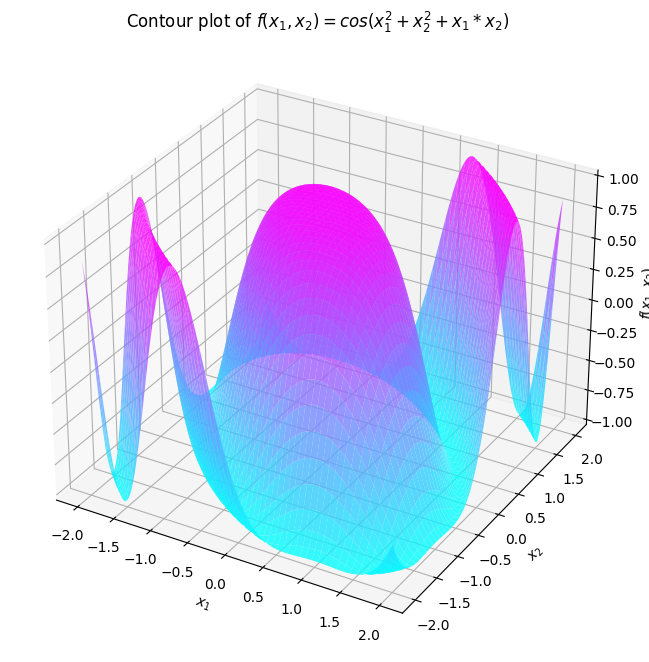

In [44]:
import matplotlib.pyplot as plt

x1_vals = np.linspace(-2, 2, 10_000)
x2_vals = np.linspace(-2, 2, 10_000)

x1, x2 = np.meshgrid(x1_vals, x2_vals)
z = f(x1, x2)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z, cmap='cool', alpha=0.8)
ax.set_title('Contour plot of $f(x_1, x_2) = cos(x_1^2 + x_2^2 +x_1*x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
plt.show()

### 2. 
Compute $\triangledown f$ and $\triangledown ^ 2 f$

$\triangledown f = \begin{bmatrix}-sin(x_1^2 + x_2^2 + x_1x_2)(2x_1 + x_2) & -sin(x_1^2 + x_2^2 +x_1x_2)(x_1 + 2x_2) \end{bmatrix}$

$\triangledown ^2 f = \begin{bmatrix}
    -cos(x_1^2 + x_2^2 + x_1x_2)(2x_1 + x_2)^2-2sin(x_1^2 + x_2^2 + x_1x_2)  & -cos(x_1^2 + x_2^2 + x_1x_2)(2x_1 + x_2)(2x_2 + x_1)-sin(x_1^2 + x_2^2 +x_1x_2)
    \\ -cos(x_1^2 + x_2^2 + x_1x_2)(2x_1 + x_2)(2x_2 + x_1)-sin(x_1^2 + x_2^2 +x_1x_2) & -cos(x_1^2 + x_2^2 +x_1x_2)(x_1 + 2x_2)^2-2sin(x_1^2 + x_2^2 + x_1x_2)
\end{bmatrix}$

Now, we define the restriction of $f$ to $S_r = \{(x_1, x_2) \in \R^2 | x_1^2 + x_2^2 + x_1x_2 < r\}$ with $r \in \R, r > 0$, i.e., $f_{|S_r}: S_r \rightarrow \R, (x_1, x_2) \rightarrow f(x_1, x_2)$

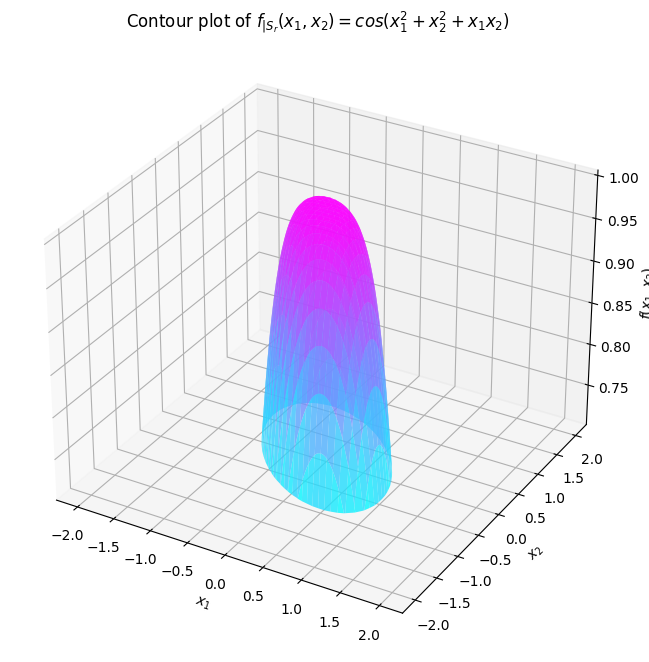

In [45]:
def S_r(x1, x2, r):
    return x1**2 + x2**2 + x1 * x2 < r

r = np.pi / 4

# compute a mask for the region S_r
mask = S_r(x1, x2, r)

# apply the mask to the function values
z = np.where(mask, f(x1, x2), np.nan)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z, cmap='cool', alpha=0.8)
ax.set_title('Contour plot of $f_{|S_r}(x_1, x_2) = cos(x_1^2 + x_2^2 + x_1x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
plt.show()

## Q2.

Implement the gradients for the following functions in 2 methods 1) Using derivate function 2) Numerical gradient

Logistic Loss: $L(w) = \Sigma_{i=1}^{n} \log(1 + exp(-y_iw^Tx_i))$

Least Square Loss: $L(w) = \Sigma_{i=1}^{n}(y_i - w^Tx_i)^2.$
Here $y_i \in \R$

In [46]:
def generate_random_data(n, d):
    X = np.random.rand(n, d)
    y = np.random.rand(n)
    return X, y

n_samples = 100
n_features = 5
X, y = generate_random_data(n_samples, n_features)

In [47]:
w = np.random.rand(5)

In [48]:
def LogisticLoss(w):
    return np.sum(np.log(1 + np.exp((-y * np.dot(X, w)))))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss_gradient(w):
    z = np.dot(X, w)
    sig_z = sigmoid(y * z)
    return -np.dot(y * X.T, 1 - sig_z)

def LeastSquareLoss(w):
    return np.sum((y - np.dot(X, w))**2)

def least_square_loss_gradeint(w):
    return np.dot(2*(y - np.dot(X, w)), -X)

In [49]:
LogisticLoss(w), LeastSquareLoss(w)

(44.24430278435615, 112.31556244416416)

In [50]:
logistic_loss_gradient(w)

array([-6.8791015 , -6.14954835, -6.46504545, -6.88055968, -6.46407236])

In [51]:
least_square_loss_gradeint(w)

array([ 90.55954189,  88.63011351,  99.81694021, 106.84248384,
       111.06033795])

In [52]:
def numericalGrad(funObj, w, epsilon):
    m = len(w)
    grad = np.zeros(m)
    for i in range(m):
        wp = np.copy(w)
        wn = np.copy(w)
        wp[i] = w[i] + epsilon
        wn[i] = w[i] - epsilon
        grad[i] = (funObj(wp) - funObj(wn))/(2*epsilon)
    return grad

In [53]:
numericalGrad(LogisticLoss, w, 0.001)

array([-6.87910159, -6.14954841, -6.46504553, -6.88055975, -6.46407244])

In [54]:
numericalGrad(LeastSquareLoss, w, 0.001)

array([ 90.55954189,  88.63011351,  99.81694021, 106.84248384,
       111.06033795])

# Theory

## 4.

Let $f:[-1, 2] \rightarrow \R, x \rightarrow exp(x^3 - 2x^2)$

### (a) 

$f\prime = (3x^2 - 4x)exp(x^3 - 2x^2)$

### (b)

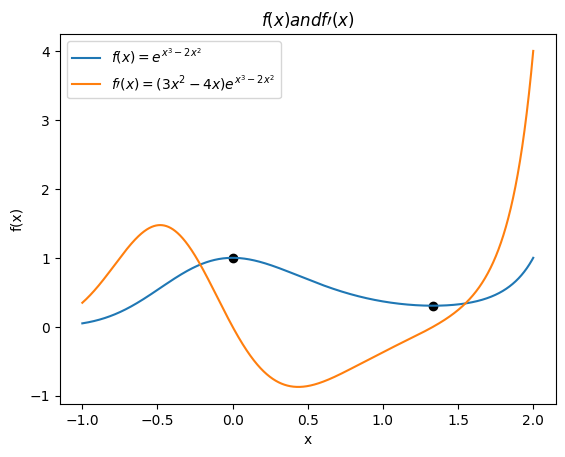

In [55]:
def f(x):
    return np.exp(x**3 - 2*x**2)

def f_prime(x):
    return (3*x**2 - 4*x) * np.exp(x**3 - 2*x**2)

x_vals = np.linspace(-1, 2, 10_000)
y_vals = f(x_vals)
z_vals = f_prime(x_vals)

plt.plot(x_vals, y_vals, label="$f(x) = e^{x^3 - 2x^2}$")
plt.plot(x_vals, z_vals, label="$f\prime(x) = (3x^2 - 4x)e^{x^3 - 2x^2}$")
# global maxima
plt.scatter(0, f(0), color='k')
# global minima
plt.scatter(4/3, f(4/3), color='k')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) and f\prime(x)$')
plt.show()